In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

In [33]:
import re, datetime
import seaborn as sns
from datetime import date
import calendar

In [18]:
# Problem 1

In [3]:
data = yf.download('^GSPC',start='2023-01-01',end='2024-01-01', interval="60m")
df = yf.download('AAPL',start='2023-01-01',end='2024-01-01', interval="60m")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df.drop(['Adj Close'], axis=1)
data.drop(['Adj Close'], axis=1)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-03 09:30:00,3853.290039,3878.459961,3817.229980,3823.179932,0
2023-01-03 10:30:00,3823.649902,3837.610107,3810.219971,3815.540039,282312663
2023-01-03 11:30:00,3815.469971,3815.469971,3800.209961,3804.169922,224684476
2023-01-03 12:30:00,3804.239990,3813.949951,3794.330078,3810.050049,189491134
2023-01-03 13:30:00,3810.100098,3815.969971,3803.340088,3804.979980,190072000
...,...,...,...,...,...
2023-12-29 11:30:00,4757.819824,4763.339844,4751.990234,4754.000000,154297747
2023-12-29 12:30:00,4754.009766,4769.129883,4753.669922,4763.370117,135492713
2023-12-29 13:30:00,4763.390137,4772.549805,4763.370117,4768.709961,129979693


In [5]:
def get_daily_data(df):
    unique_dates = set()
    
    Date = []
    Open = []
    High = []
    Low = []
    Close = []
    Volume = []

    for i in df.index:
        date = i.date()
        unique_dates.add(date)
    
    
    Date = sorted(list(unique_dates))
    
    for i in Date:
        boolean_mask = df.index.date == i
        filtered_df = df.loc[boolean_mask]
        Open.append(filtered_df['Open'][0])
        Close.append(filtered_df['Close'][-1])
        High.append(filtered_df['High'].max())
        Low.append(filtered_df['Low'].min())
        Volume.append(filtered_df['Volume'].sum())
        
    daily_data = pd.DataFrame({
        'Date': Date,
        'Open': Open,
        'High': High,
        'Low': Low,
        'Close': Close,
        'Volume': Volume
    })
    
    return daily_data
    

In [6]:
SP = get_daily_data(data)
AAPL = get_daily_data(df)
AAPL

,Date,Open,High,Low,Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.050003,96727462
1,2023-01-04,126.889999,128.655701,125.080002,126.379997,80602641
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,71834671
3,2023-01-06,126.010002,130.289993,124.889999,129.520004,76325908
4,2023-01-09,130.464996,133.410004,129.889999,130.190002,63029711
...,...,...,...,...,...,...
245,2023-12-22,195.179993,195.410004,192.970001,193.529999,31118109
246,2023-12-26,193.610001,193.889999,192.830002,193.039993,24124450
247,2023-12-27,192.490005,193.500000,191.089996,193.169998,39685774
248,2023-12-28,194.139999,194.660004,193.169998,193.580002,29145990


In [10]:
def returns(df):
    df['Daily return'] = (df['Close'] - df['Open']) / df['Open'] * 100
    first_open = df['Open'].iloc[0]
    df['Cumulative return'] = (df['Close'] - first_open) / first_open * 100 
        
    return df

In [13]:
AAPL = returns(AAPL)
SP = returns(SP)
AAPL.head()

,Date,Open,High,Low,Close,Volume,Daily return,Cumulative return
0,2023-01-03,130.279999,130.899994,124.169998,125.050003,96727462,-4.014427,-4.014427
1,2023-01-04,126.889999,128.655701,125.080002,126.379997,80602641,-0.401925,-2.993554
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,71834671,-1.659719,-4.037459
3,2023-01-06,126.010002,130.289993,124.889999,129.520004,76325908,2.785495,-0.583355
4,2023-01-09,130.464996,133.410004,129.889999,130.190002,63029711,-0.210780,-0.069079


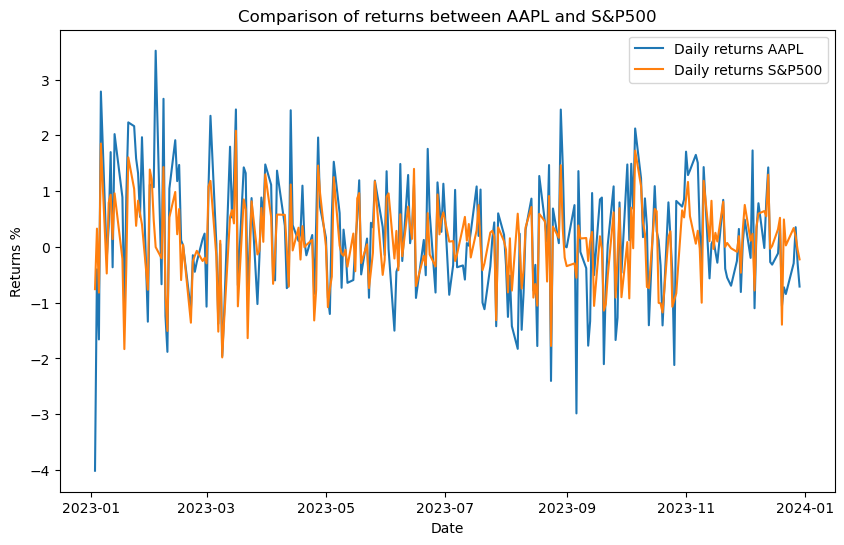

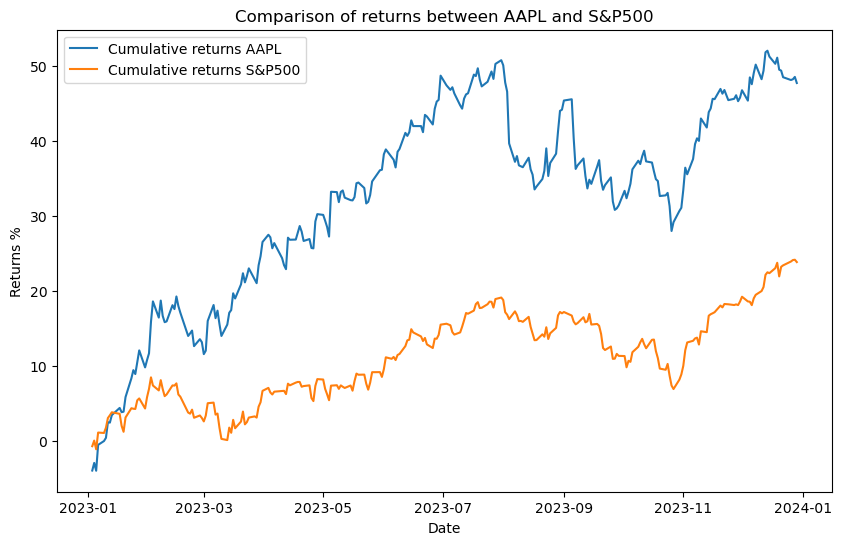

In [29]:
merged_df = pd.merge(AAPL, SP, on='Date', suffixes=('_st', '_in'))

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Daily return_st'], label='Daily returns AAPL')
plt.plot(merged_df['Date'], merged_df['Daily return_in'], label='Daily returns S&P500')
plt.title("Comparison of returns between AAPL and S&P500")
plt.xlabel("Date")
plt.ylabel("Returns %")
plt.legend()  
plt.show()  

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Cumulative return_st'], label='Cumulative returns AAPL')
plt.plot(merged_df['Date'], merged_df['Cumulative return_in'], label='Cumulative returns S&P500') 
plt.title("Comparison of returns between AAPL and S&P500")
plt.xlabel("Date")
plt.ylabel("Returns %")
plt.legend()  
plt.show()  

# I put all four on the same graph but that didn't make much sense for daily returns

In [26]:
#Problem 2
#Gonna use data of AAPL only

In [27]:
AAPL.head()

,Date,Open,High,Low,Close,Volume,Daily return,Cumulative return
0,2023-01-03,130.279999,130.899994,124.169998,125.050003,96727462,-4.014427,-4.014427
1,2023-01-04,126.889999,128.655701,125.080002,126.379997,80602641,-0.401925,-2.993554
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,71834671,-1.659719,-4.037459
3,2023-01-06,126.010002,130.289993,124.889999,129.520004,76325908,2.785495,-0.583355
4,2023-01-09,130.464996,133.410004,129.889999,130.190002,63029711,-0.210780,-0.069079


In [36]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AAPL['Weekday'] = AAPL['Date'].dt.day_name()
AAPL.head()

,Date,Open,High,Low,Close,Volume,Daily return,Cumulative return,Weekday
0,2023-01-03,130.279999,130.899994,124.169998,125.050003,96727462,-4.014427,-4.014427,Tuesday
1,2023-01-04,126.889999,128.655701,125.080002,126.379997,80602641,-0.401925,-2.993554,Wednesday
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,71834671,-1.659719,-4.037459,Thursday
3,2023-01-06,126.010002,130.289993,124.889999,129.520004,76325908,2.785495,-0.583355,Friday
4,2023-01-09,130.464996,133.410004,129.889999,130.190002,63029711,-0.210780,-0.069079,Monday


In [39]:
AAPL['Week_Number'] = AAPL['Date'].dt.isocalendar().week
AAPL.head()

,Date,Open,High,Low,Close,Volume,Daily return,Cumulative return,Weekday,Week_Number
0,2023-01-03,130.279999,130.899994,124.169998,125.050003,96727462,-4.014427,-4.014427,Tuesday,1
1,2023-01-04,126.889999,128.655701,125.080002,126.379997,80602641,-0.401925,-2.993554,Wednesday,1
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,71834671,-1.659719,-4.037459,Thursday,1
3,2023-01-06,126.010002,130.289993,124.889999,129.520004,76325908,2.785495,-0.583355,Friday,1
4,2023-01-09,130.464996,133.410004,129.889999,130.190002,63029711,-0.210780,-0.069079,Monday,2


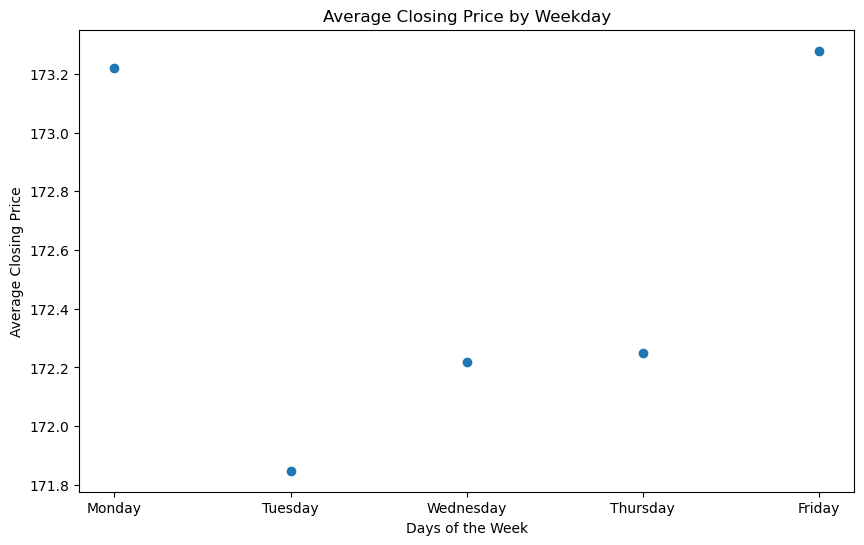

In [62]:
return_on_days = {}
weekdays = set()

for i in AAPL['Weekday']:
    weekdays.add(i)
    
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekdays = sorted(weekdays, key=lambda x: weekday_order.index(x))
    
for i in weekdays:
    boolean_mask = AAPL['Weekday'] == i
    filtered_df = AAPL.loc[boolean_mask]
    return_on_days[i] = filtered_df['Close'].mean()
    
days = list(return_on_days.keys())
avg_closing_price = list(return_on_days.values())
    
plt.figure(figsize=(10, 6))
plt.scatter(days,avg_closing_price)
plt.xlabel("Days of the Week")
plt.ylabel("Average Closing Price")
plt.title("Average Closing Price by Weekday")
plt.show()

#I have plotted the data first from which we can see the average closing price in highest on friday
#which can also be confirmed by printing the dictionary I've made

In [61]:
AAPL['Rolling Mean'] = AAPL['Close'].rolling(window=7).mean()
print(AAPL)

          Date        Open        High         Low       Close    Volume  \
0   2023-01-03  130.279999  130.899994  124.169998  125.050003  96727462   
1   2023-01-04  126.889999  128.655701  125.080002  126.379997  80602641   
2   2023-01-05  127.129997  127.769997  124.760002  125.019997  71834671   
3   2023-01-06  126.010002  130.289993  124.889999  129.520004  76325908   
4   2023-01-09  130.464996  133.410004  129.889999  130.190002  63029711   
..         ...         ...         ...         ...         ...       ...   
245 2023-12-22  195.179993  195.410004  192.970001  193.529999  31118109   
246 2023-12-26  193.610001  193.889999  192.830002  193.039993  24124450   
247 2023-12-27  192.490005  193.500000  191.089996  193.169998  39685774   
248 2023-12-28  194.139999  194.660004  193.169998  193.580002  29145990   
249 2023-12-29  193.899994  194.399994  191.725006  192.520004  32296055   

     Daily return  Cumulative return    Weekday  Week_Number  Rolling Mean  
0       -4